In [169]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import scipy.stats as stats
from scipy.stats import zscore

from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
import xgboost as xgb
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV 


import warnings 
warnings.filterwarnings('ignore')

In [170]:
df = pd.read_csv(r'C:\Users\hites\Downloads\happiness_score_dataset.csv')

In [171]:
df.head()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


In [172]:
df.tail()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
153,Rwanda,Sub-Saharan Africa,154,3.465,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042
154,Benin,Sub-Saharan Africa,155,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328
155,Syria,Middle East and Northern Africa,156,3.006,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858
156,Burundi,Sub-Saharan Africa,157,2.905,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302
157,Togo,Sub-Saharan Africa,158,2.839,0.06727,0.20868,0.13995,0.28443,0.36453,0.10731,0.16681,1.56726


In [173]:
df.shape

(158, 12)

In [174]:
df.describe()

,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
mean,79.493671,5.375734,0.047885,0.846137,0.991046,0.630259,0.428615,0.143422,0.237296,2.098977
std,45.754363,1.145010,0.017146,0.403121,0.272369,0.247078,0.150693,0.120034,0.126685,0.553550
min,1.000000,2.839000,0.018480,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.328580
25%,40.250000,4.526000,0.037268,0.545808,0.856823,0.439185,0.328330,0.061675,0.150553,1.759410
50%,79.500000,5.232500,0.043940,0.910245,1.029510,0.696705,0.435515,0.107220,0.216130,2.095415
75%,118.750000,6.243750,0.052300,1.158448,1.214405,0.811013,0.549092,0.180255,0.309883,2.462415
max,158.000000,7.587000,0.136930,1.690420,1.402230,1.025250,0.669730,0.551910,0.795880,3.602140


In [175]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        158 non-null    object 
 1   Region                         158 non-null    object 
 2   Happiness Rank                 158 non-null    int64  
 3   Happiness Score                158 non-null    float64
 4   Standard Error                 158 non-null    float64
 5   Economy (GDP per Capita)       158 non-null    float64
 6   Family                         158 non-null    float64
 7   Health (Life Expectancy)       158 non-null    float64
 8   Freedom                        158 non-null    float64
 9   Trust (Government Corruption)  158 non-null    float64
 10  Generosity                     158 non-null    float64
 11  Dystopia Residual              158 non-null    float64
dtypes: float64(9), int64(1), object(2)
memory usage: 1

In [176]:
df.isnull().sum()

Country                          0
Region                           0
Happiness Rank                   0
Happiness Score                  0
Standard Error                   0
Economy (GDP per Capita)         0
Family                           0
Health (Life Expectancy)         0
Freedom                          0
Trust (Government Corruption)    0
Generosity                       0
Dystopia Residual                0
dtype: int64

In [177]:
df.columns

Index(['Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'Standard Error', 'Economy (GDP per Capita)', 'Family',
       'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)',
       'Generosity', 'Dystopia Residual'],
      dtype='object')

<AxesSubplot:xlabel='Happiness Score', ylabel='Economy (GDP per Capita)'>

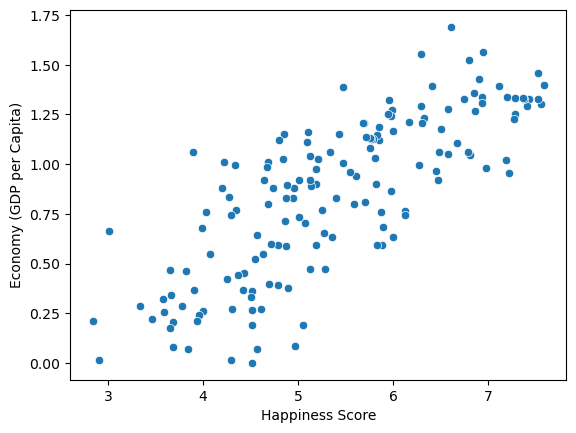

In [178]:
#Plot Between Happiness and Economy(GDP)

sns.scatterplot(data=df, x='Happiness Score', y='Economy (GDP per Capita)' )

<AxesSubplot:xlabel='Happiness Score', ylabel='Region'>

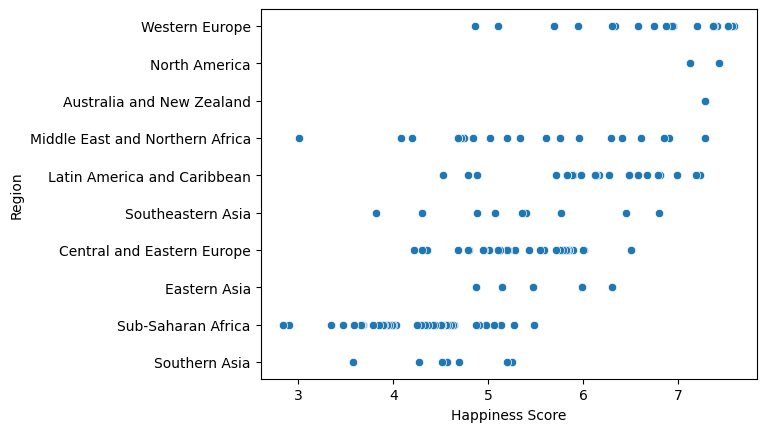

In [179]:
#Plot Between Happiness Score Vs Reigon

sns.scatterplot(data=df, x='Happiness Score', y='Region' )

<AxesSubplot:xlabel='Happiness Score', ylabel='Region'>

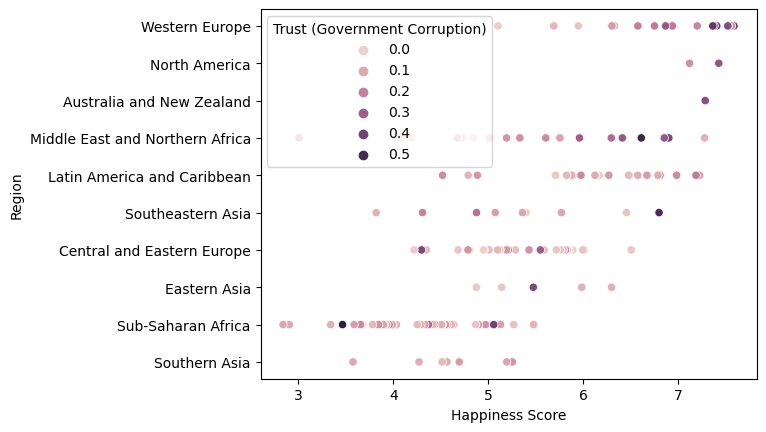

In [180]:
#Plot Between Happiness Score Vs Reigon

sns.scatterplot(data=df, x='Happiness Score', y='Region', hue = 'Trust (Government Corruption)' )

<AxesSubplot:xlabel='Happiness Score', ylabel='Standard Error'>

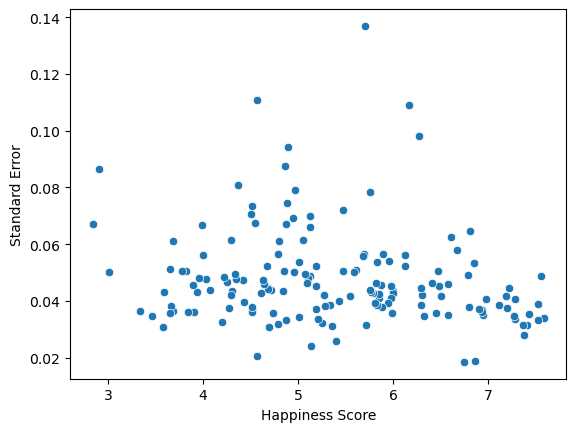

In [181]:
#Plot Between Happiness Score Vs 'Standard Error'

sns.scatterplot(data=df, x='Happiness Score', y='Standard Error')

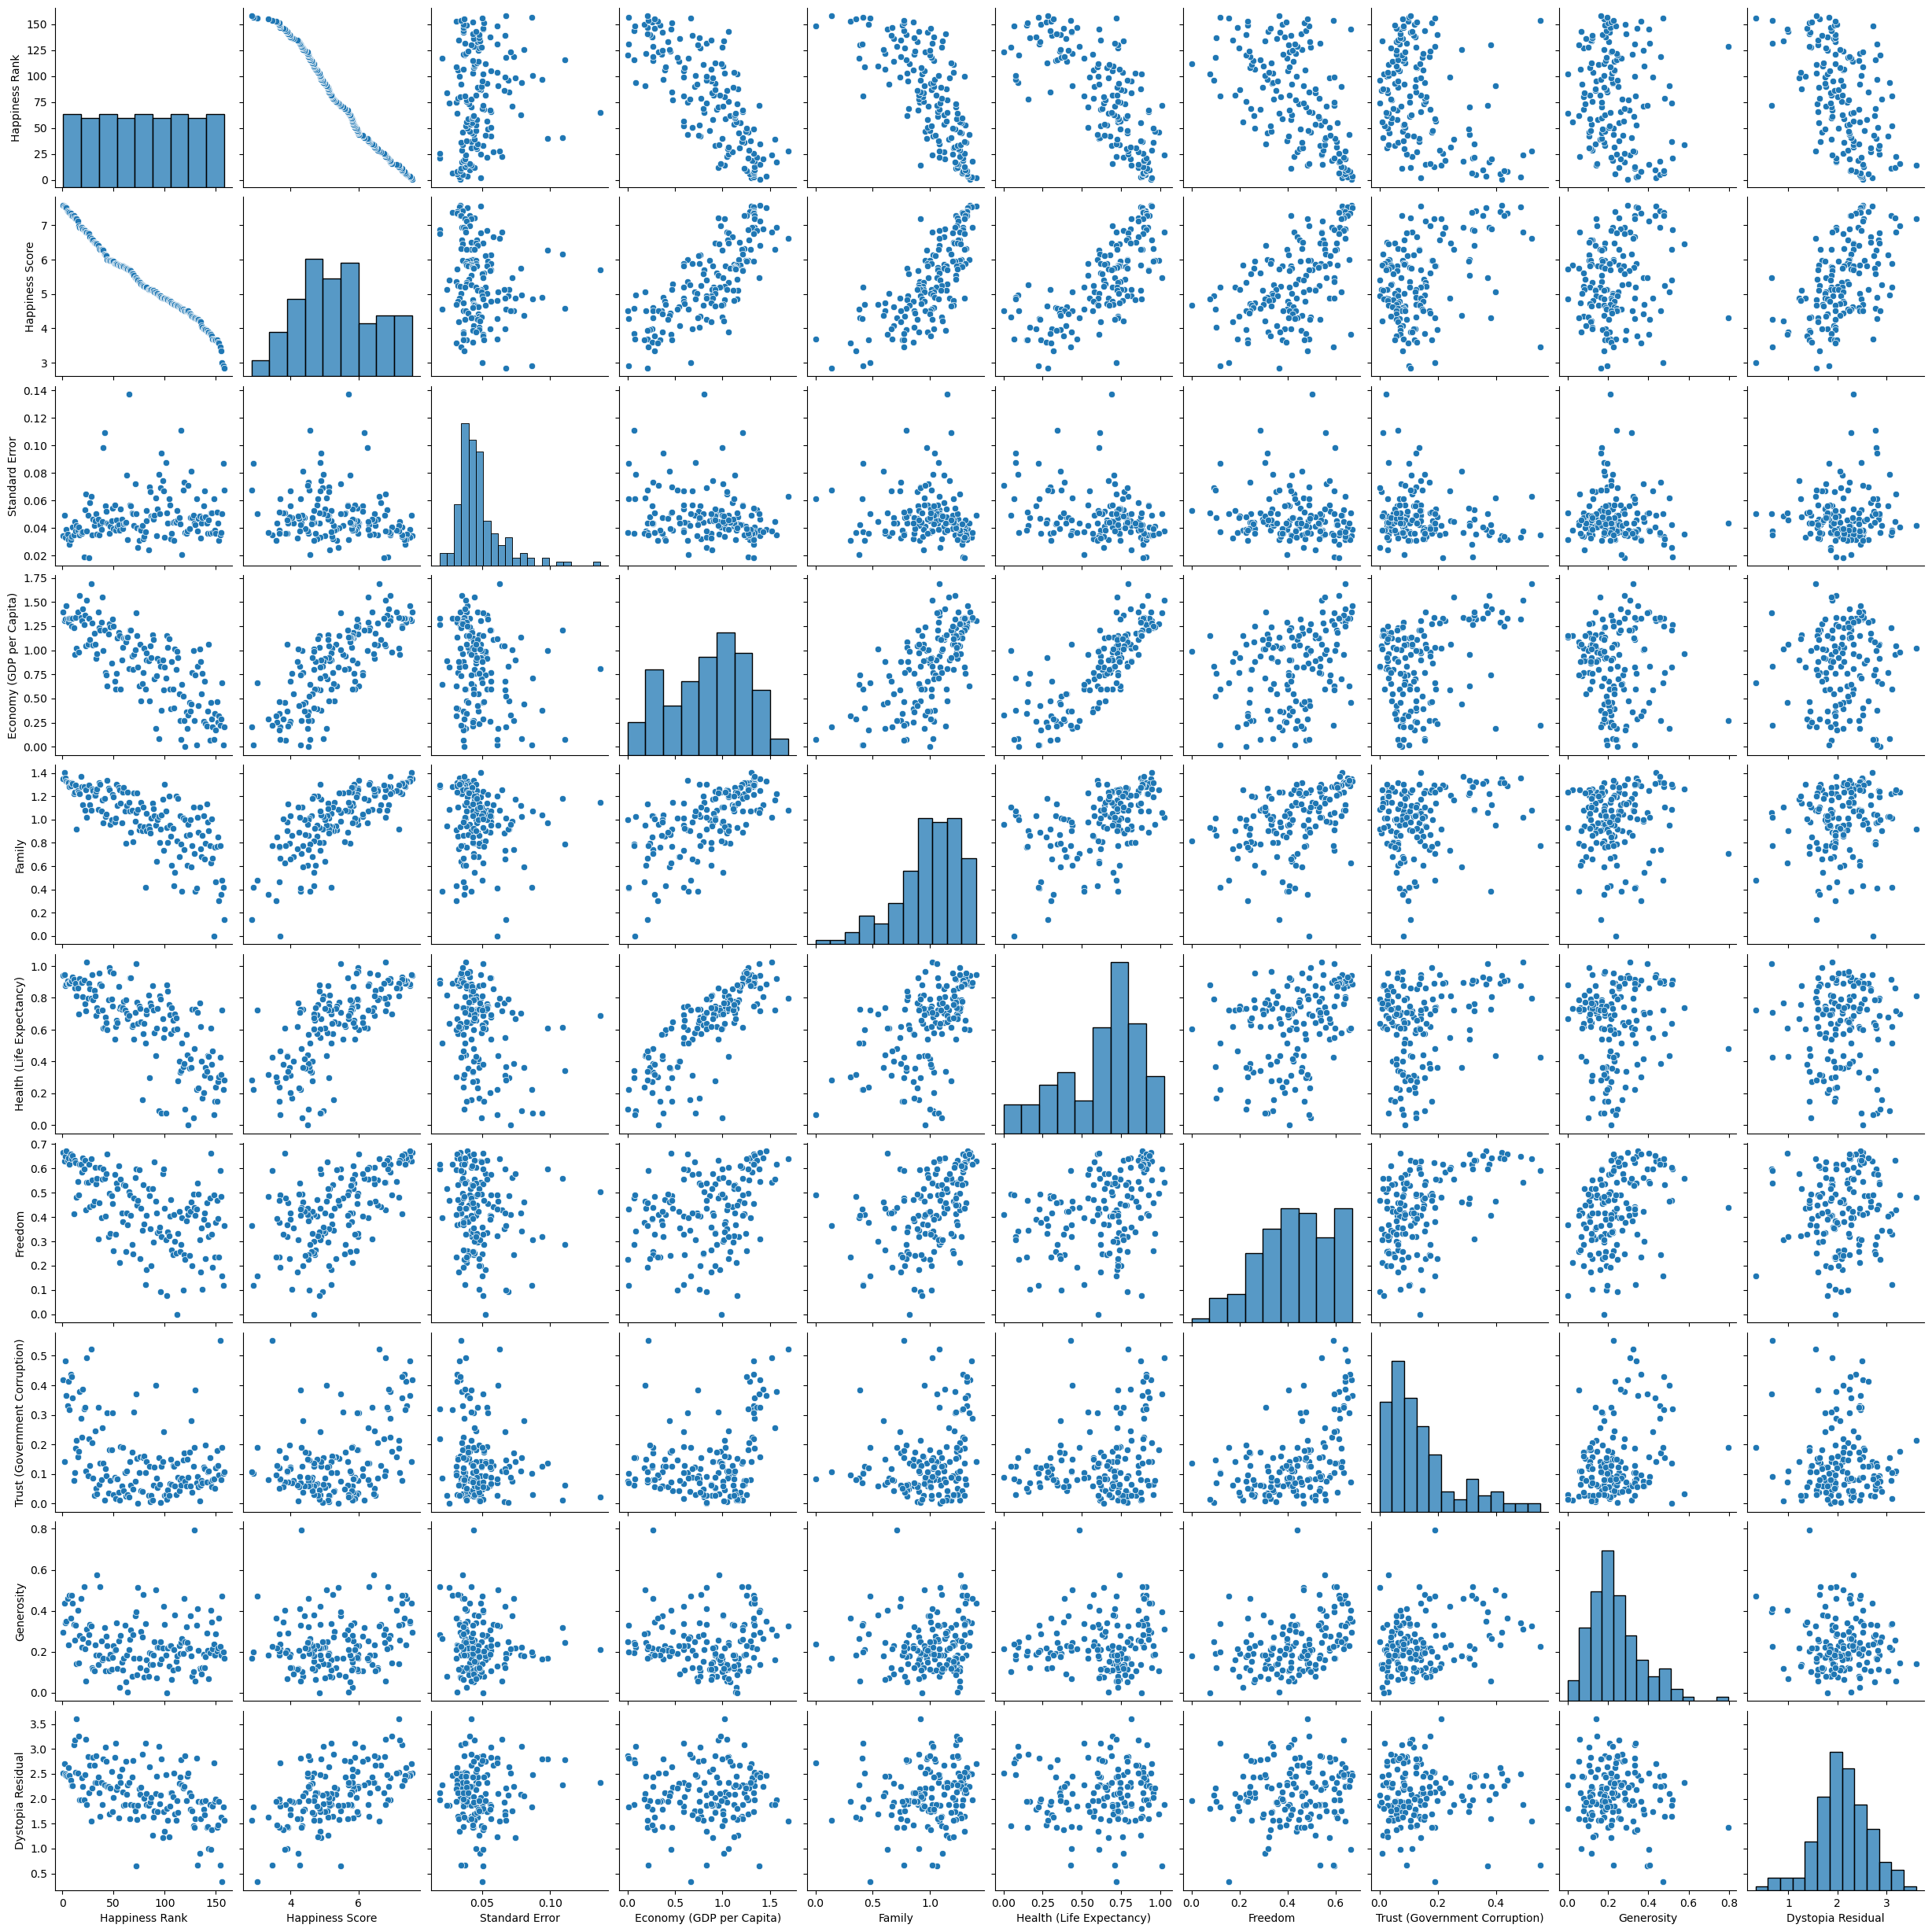

In [182]:
sns.pairplot(df)
plt.show()

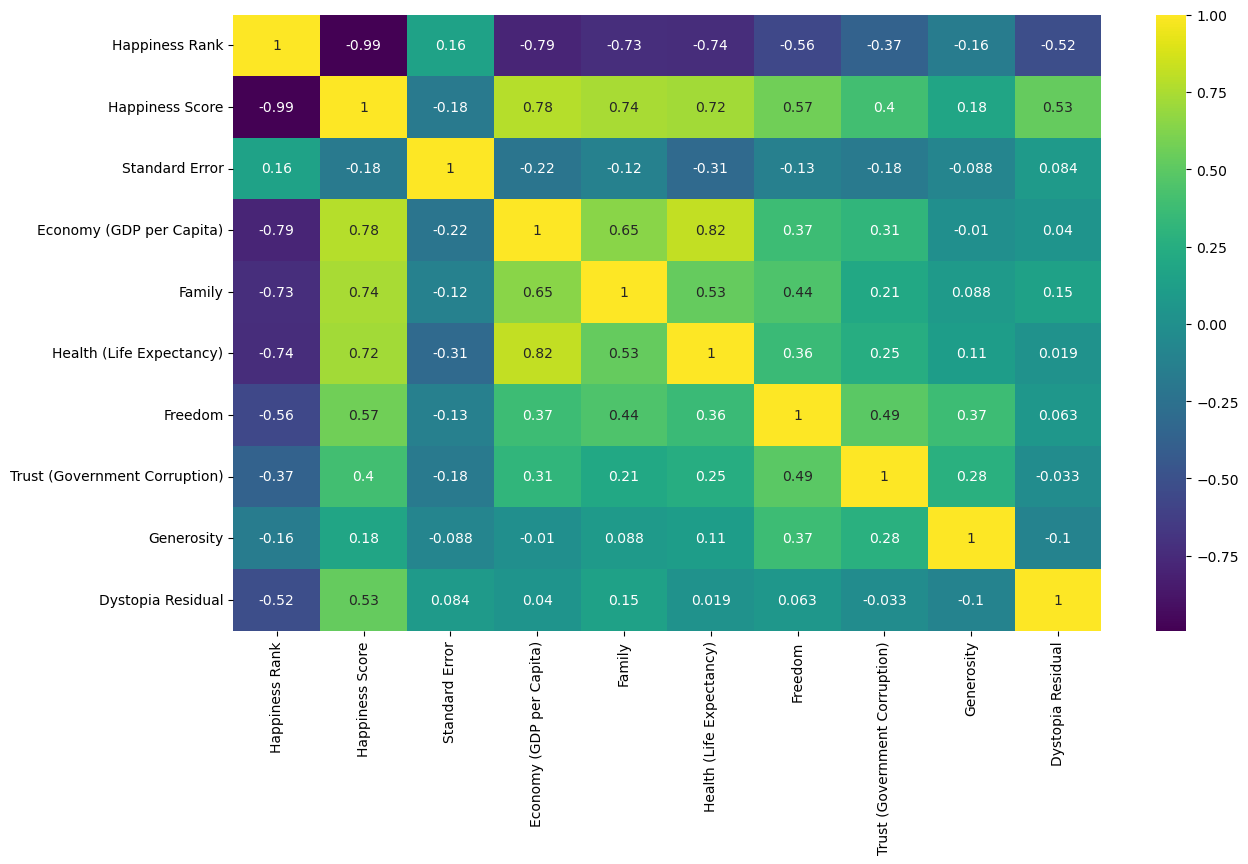

In [138]:
fig,ax=plt.subplots(figsize=(14,8))
sns.heatmap(df.corr(), annot=True, cmap='viridis');

In [183]:
#Positive Correlationhip (over 0.5)
#Happiness Score VS Economy, Family, Health, Freedom, Dystopia Residual
#Economy VS Family, Health
#Family VS Health
#Freedom VS Trust
#Negative Correlationship (less -0.5)
#Happiness Rank VS Happiness Score, Economy, Family, Health, Freedom, Dystopia Residual

array([<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
       <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
       <AxesSubplot:>], dtype=object)

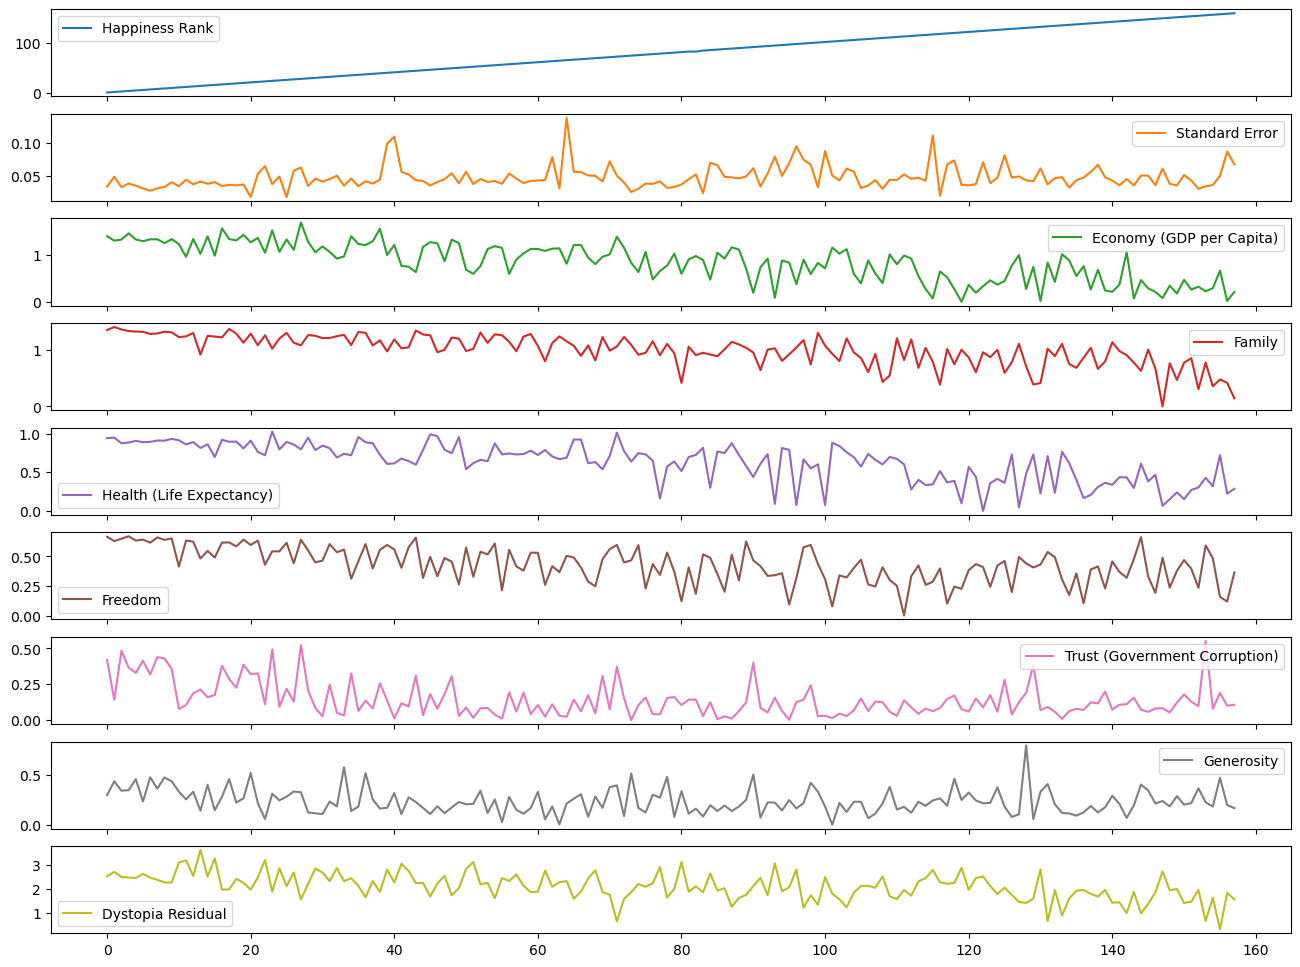

In [145]:
df.drop('Happiness Score', axis=1).plot(subplots=True, figsize=(16,12))

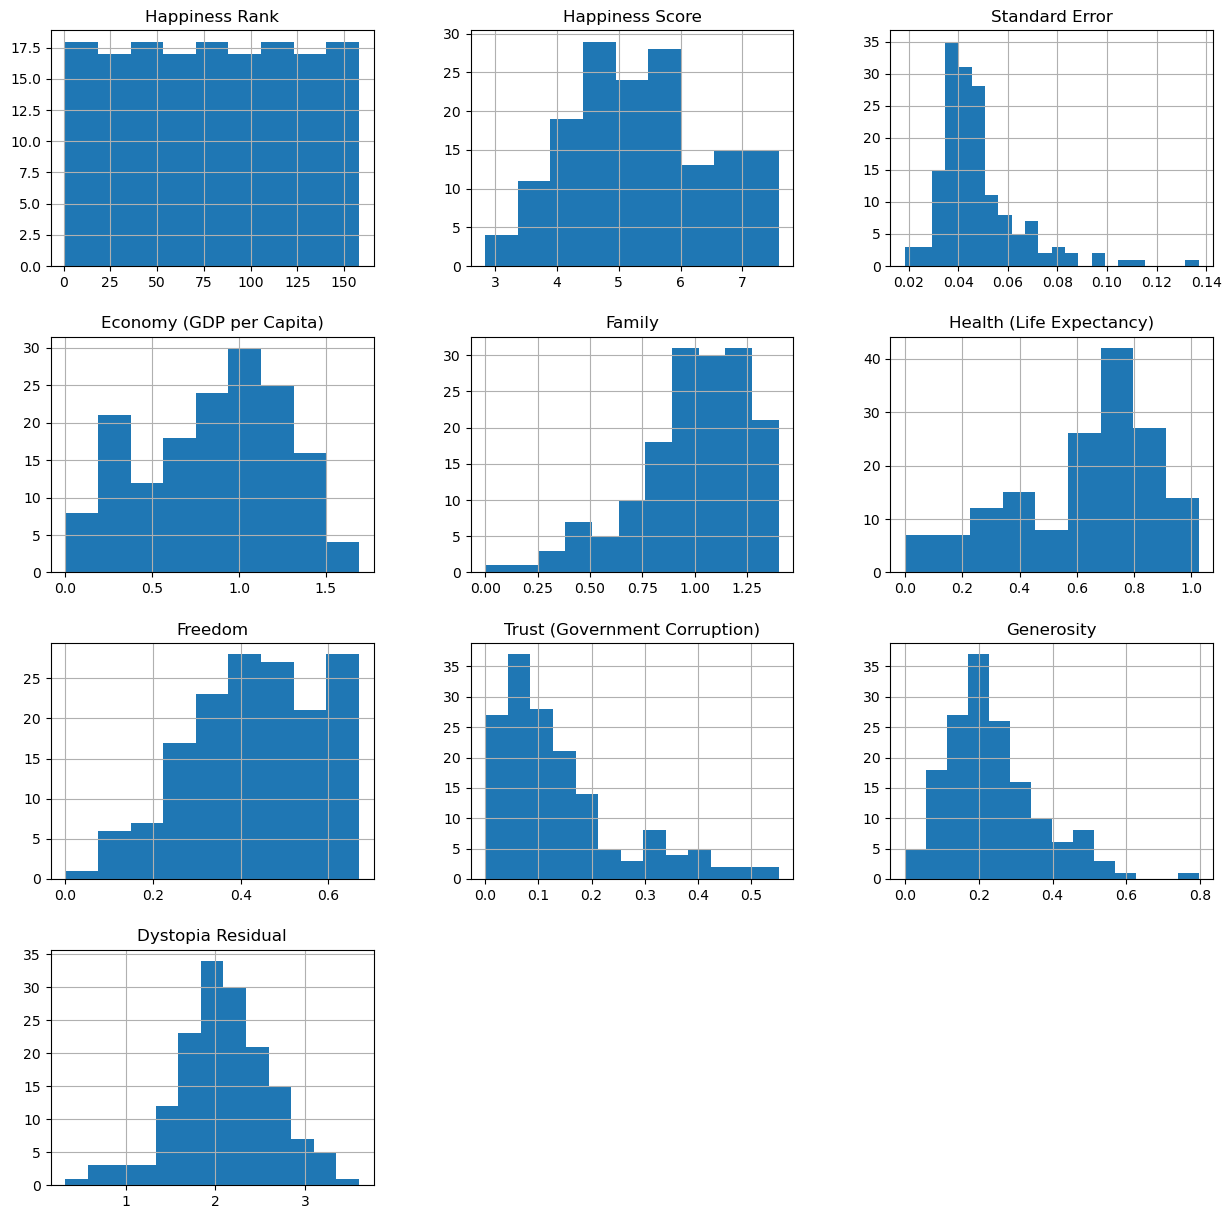

In [184]:
df.hist(bins='auto', figsize=(15,15));

In [186]:
#Positive Correlationhip (over 0.5)
#Happiness Score VS Economy, Family, Health, Freedom, Dystopia Residual
#Economy VS Family, Health
#Family VS Health
#Freedom VS Trust
#Negative Correlationship (less -0.5)
#Happiness Rank VS Happiness Score, Economy, Family, Health, Freedom, Dystopia Residual

In [187]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        158 non-null    object 
 1   Region                         158 non-null    object 
 2   Happiness Rank                 158 non-null    int64  
 3   Happiness Score                158 non-null    float64
 4   Standard Error                 158 non-null    float64
 5   Economy (GDP per Capita)       158 non-null    float64
 6   Family                         158 non-null    float64
 7   Health (Life Expectancy)       158 non-null    float64
 8   Freedom                        158 non-null    float64
 9   Trust (Government Corruption)  158 non-null    float64
 10  Generosity                     158 non-null    float64
 11  Dystopia Residual              158 non-null    float64
dtypes: float64(9), int64(1), object(2)
memory usage: 1

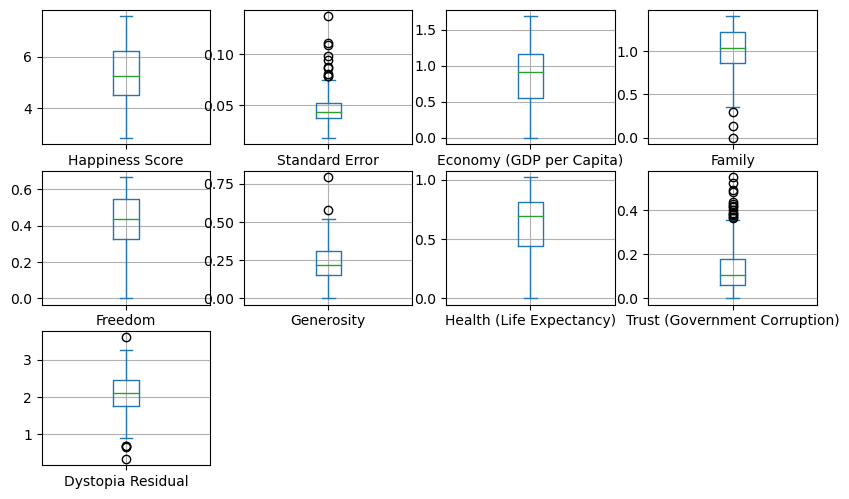

In [188]:
# checking for outliers with boxplots
df[['Happiness Score', 'Standard Error', 'Economy (GDP per Capita)', 'Family', 'Freedom', 'Generosity','Health (Life Expectancy)','Trust (Government Corruption)','Dystopia Residual',]].plot(kind='box', subplots=True, layout=(4,4), figsize=(10,8), grid=True);

In [189]:
# Visualization of happiness score
from plotly.offline import plot, iplot, init_notebook_mode
init_notebook_mode(connected=True)
import plotly.express as px

fig = px.choropleth(df, locations='Country',
                    locationmode='country names',
                    color='Happiness Score',
                    hover_name='Country',
                    title='Happiness Index 2023',
                    color_continuous_scale=px.colors.sequential.Plasma)
fig.show()

In [86]:
#split the data set



In [190]:
X = df.drop(columns = ['Country','Region','Happiness Rank','Happiness Score' ])
y = df['Happiness Score']

In [191]:
print(X)

     Standard Error  Economy (GDP per Capita)   Family  \
0           0.03411                   1.39651  1.34951   
1           0.04884                   1.30232  1.40223   
2           0.03328                   1.32548  1.36058   
3           0.03880                   1.45900  1.33095   
4           0.03553                   1.32629  1.32261   
..              ...                       ...      ...   
153         0.03464                   0.22208  0.77370   
154         0.03656                   0.28665  0.35386   
155         0.05015                   0.66320  0.47489   
156         0.08658                   0.01530  0.41587   
157         0.06727                   0.20868  0.13995   

     Health (Life Expectancy)  Freedom  Trust (Government Corruption)  \
0                     0.94143  0.66557                        0.41978   
1                     0.94784  0.62877                        0.14145   
2                     0.87464  0.64938                        0.48357   
3          

In [192]:
print(y)

0      7.587
1      7.561
2      7.527
3      7.522
4      7.427
       ...  
153    3.465
154    3.340
155    3.006
156    2.905
157    2.839
Name: Happiness Score, Length: 158, dtype: float64


In [193]:
#spliting the dataset

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)


In [194]:
print(X.shape, X_train.shape, X_test.shape)

(158, 8) (118, 8) (40, 8)


In [195]:
lg = LinearRegression()
lg.fit(X_train,y_train) 
y_pred = lg.predict(X_test)

In [196]:
y_pred

array([4.30694504, 5.98709086, 4.19427189, 2.90452349, 5.0572242 ,
       6.57405251, 4.89749922, 4.87600206, 4.94869405, 3.93078501,
       6.9013752 , 5.82827523, 6.98257763, 5.54816509, 6.78623178,
       6.50507957, 4.50716163, 4.68557226, 4.971071  , 5.69530314,
       3.65506716, 6.93736938, 7.19983412, 7.28401637, 6.48512922,
       5.19230158, 5.88897765, 3.95562312, 4.36915071, 3.68085465,
       3.78077742, 5.33248989, 3.99477664, 5.83264712, 4.34998419,
       5.12885705, 3.34004529, 6.12277232, 5.60462902, 4.55051898])

In [197]:
r2_score(y_test,y_pred)

0.9999999445407123